# Machine Learning

Invece di fornire alla macchina istruzioni esplicite, le forniamo solo dati. Usando questi dati, il computer impara a riconoscere pattern e diventa in grado di eseguire compiti da sé.

Tipi di Learning che affronteremo:
- Supervised Learning
- Reinforment Learning
- Unsupervised Learning

# Supervised Learning

Supervised learning è una task (compito) in cui il computer impara una funzione che riesce a mappare gli input agli output, basandosi su un dataset di coppie input-output.

Supervised learning include varie task. Quelle che affronteremo sono:
- Classification
- Regression

## Classification

Task di Supervised Learning in cui la funzione mappa un input a un output discreto.

Alcuni tipi di classificazione:
- **NN**: Nearest-Neighbor
- **Perceptron Learning**
- **Support Vector Machine**: SVM

### Esempio

- Osserviamo la natura, in cui una funzione $f(humidity, pressure)$ mappa gli input a un valore discreto: `Piove` o `Non piove`.
  - $f(93, 999.7) =$ `Rain`
  - $f(49, 1015.5) = $`No Rain`
  - $f(79, 1031.1) = $`No Rain`
- Questa funzione ci è nascosta, ed è probabilmente influenzata da molte altre variabili a cui non abbiamo accesso.
- Il nostro obiettivo è creare una funzione $h(humidity, pressure)$ che può approssimare il comportamento della funzione $f$.
- Questa task può essere visualizzata tracciando i giorni sulla dimensione dell'$umidità$ e della $pressione$ (gli input), colorando ogni data point in blu se ha piovuto quel giorno e rosso se non ha piovuto quel giorno (l'output).
- Il data point bianco ha solo l'input, e il computer deve valutare l'output.

Alcune mappature:

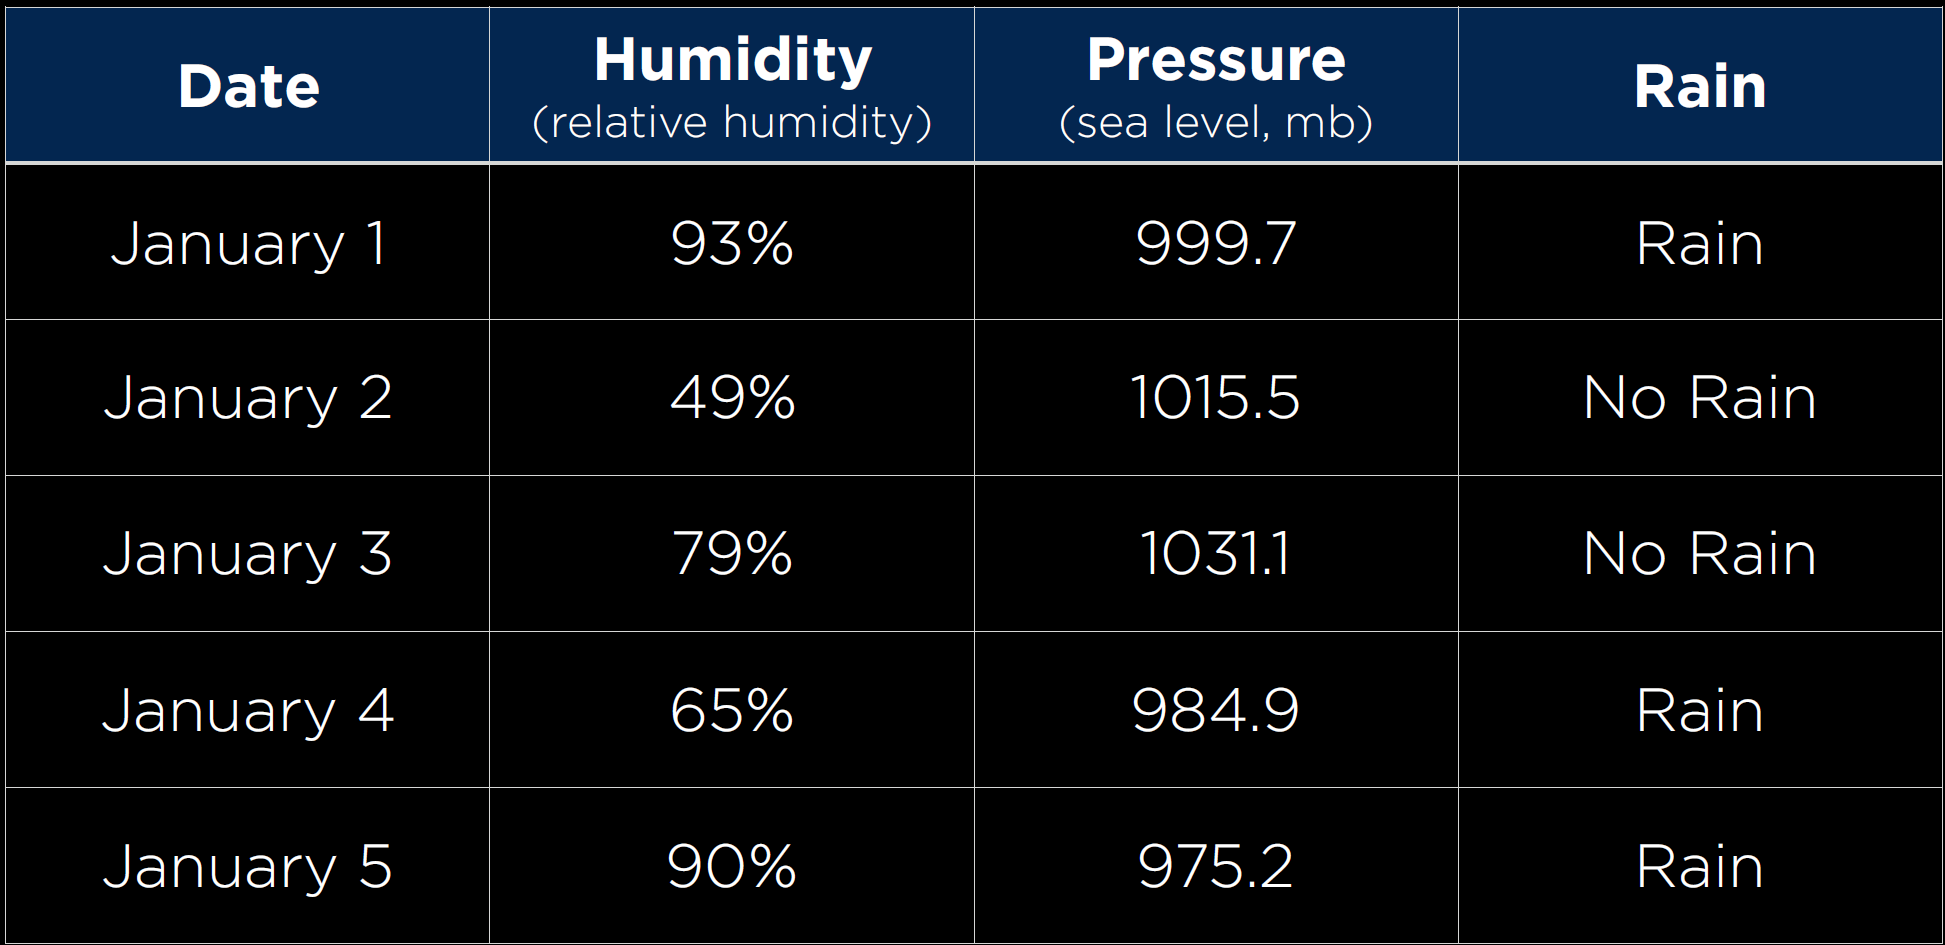

Esempio di grafico.

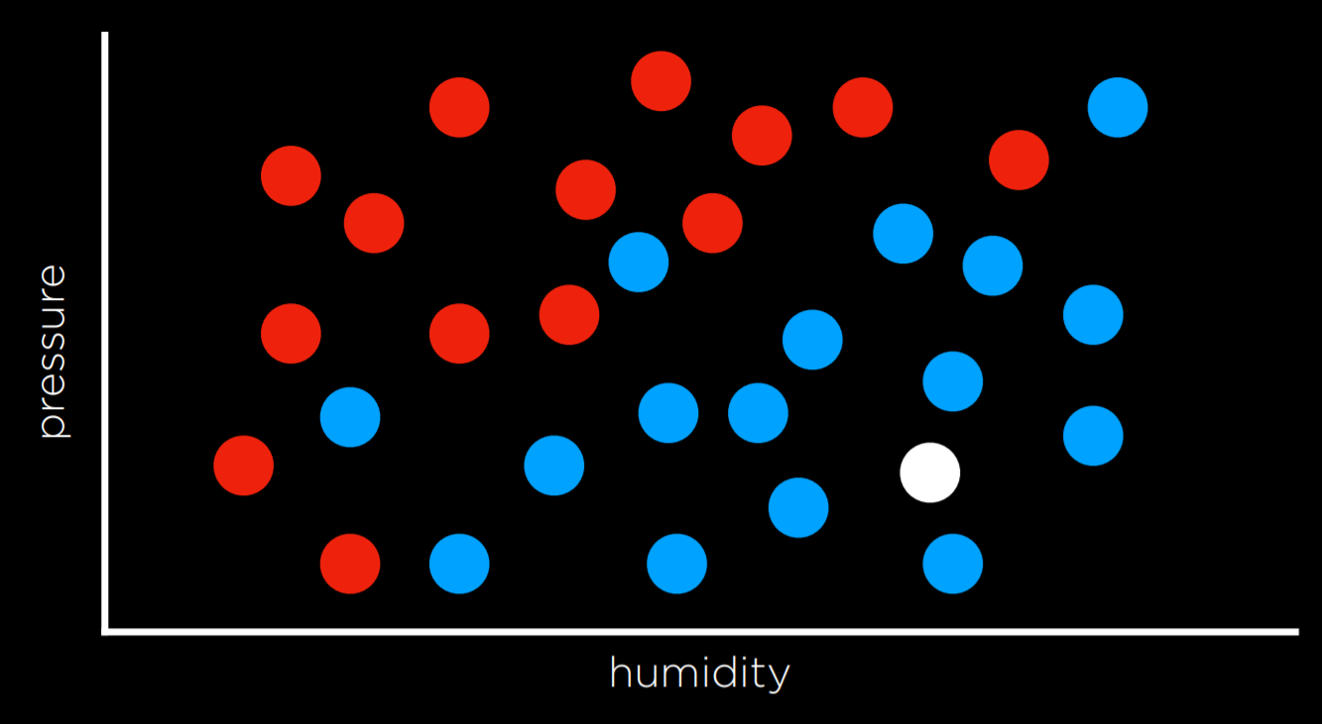

Il pallino bianco, valutando i vicini, probabilmente rientra tra i punti blu. Questo approccio è chiamato **Nearest Neighbor Classification**

### Nearest-Neighbor Classification (NN)

Algoritmo che, dato un input, sceglie la classe del data point più vicino per quell'input.

#### Esempio

Come detto prima, il punto bianco nel grafico precedente assume classe "blu" seguendo questo tipo di classificazione.

Ma se invece il grafico è questo?

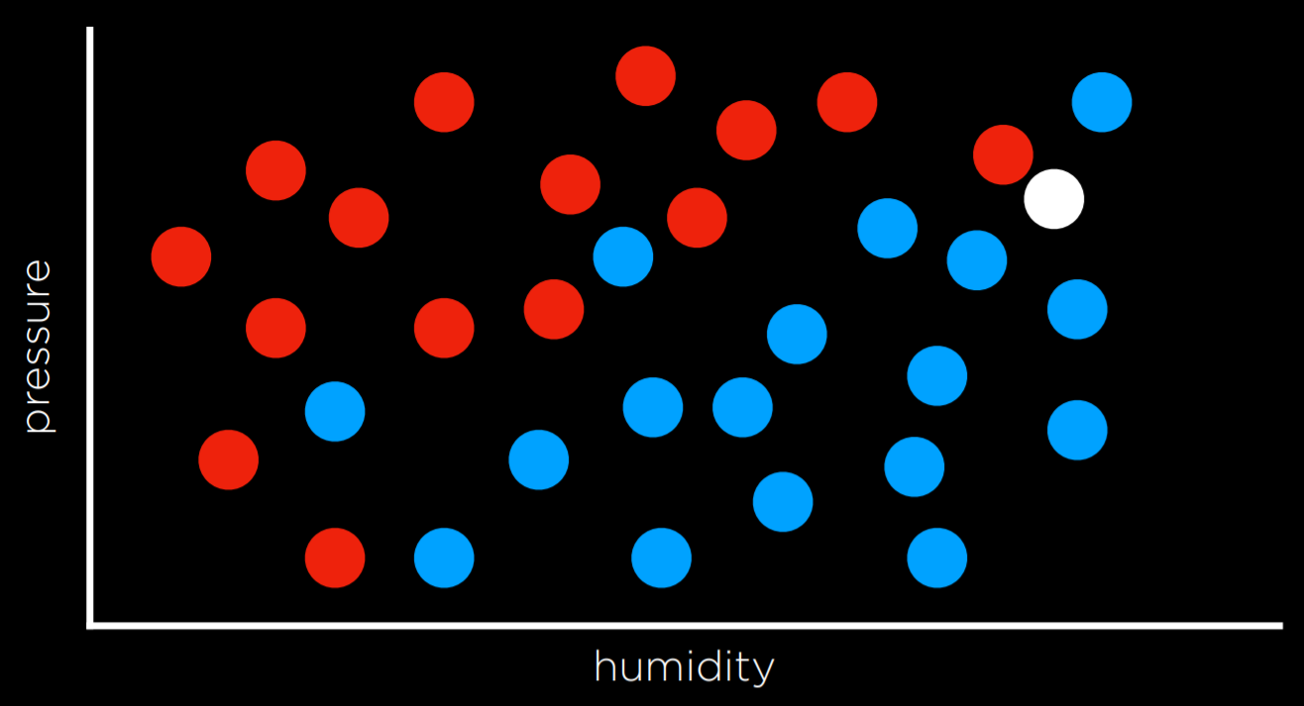

*NN* dice che il punto bianco rientra nei rossi, ma l'intuizione potrebbe portare a dire che appartiene ai blu dal momento che è circondato da essi.

Un modo per evitare questo problema è l'algoritmo **k-NN**

### k-Nearest-Neighbor Classification (k-NN)

Algoritmo che, dato un input, sceglie la classe più comune dei $k$ data point più vicini a quell'input.

Un contro di questo algoritma è che, usando un approccio ingenuo, l'algoritmo deve misurare la distanza di ogni singolo punto dall'input, che può essere una cosa molto costosa. Questo può essere compensato dall'uso di strutture dati che lo complementano, per velocizzare i calcoli.

## Perceptron Learning

È un altro modo di affrontare i problemi di Classificazione, diverso dalla strategia NN o k-NN.

Si osservano tutti i dati nel loro insieme, poi si crea un "confine decisionale". In 2D possiamo disegnare una linea tra le due classe. Ogni dato addizionale sarà classificato basandosi su quale lato della linea si trova.

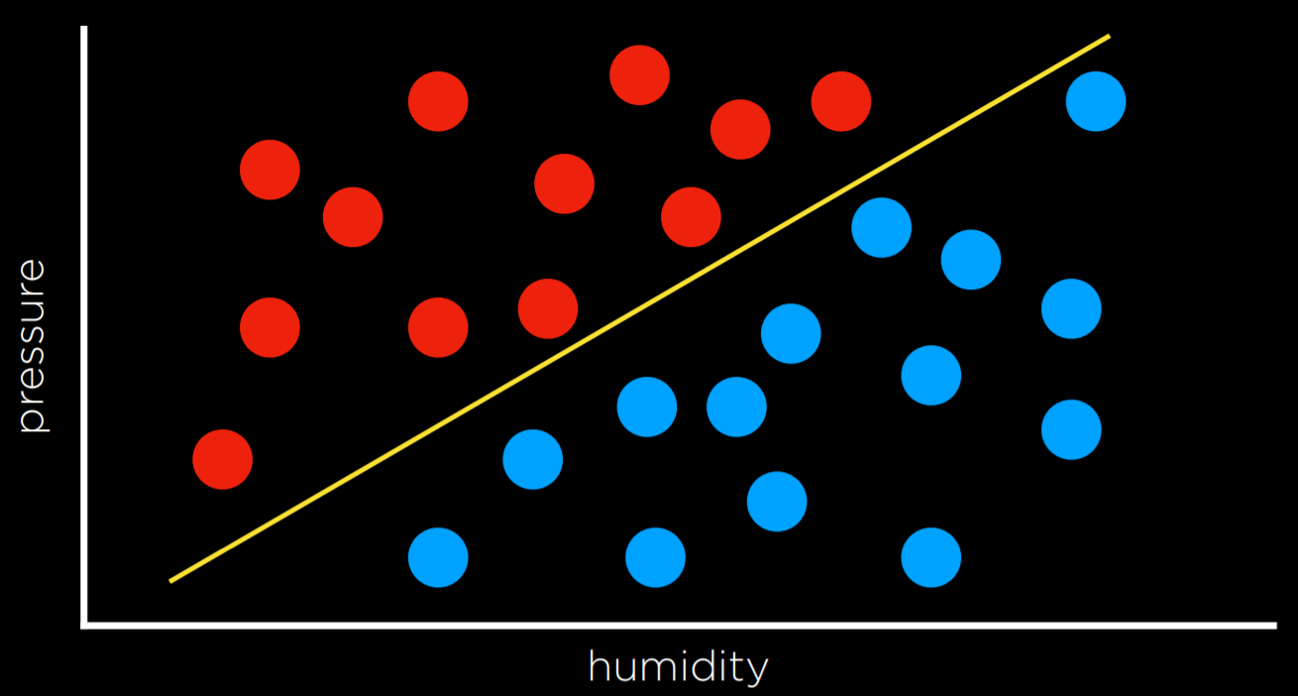

In generale, non è mai possibile separare i dati in maniera così lineare.

Di solito è più un'approssimazione come quella dell'immagine sotto, o magari una linea non può proprio esserci.

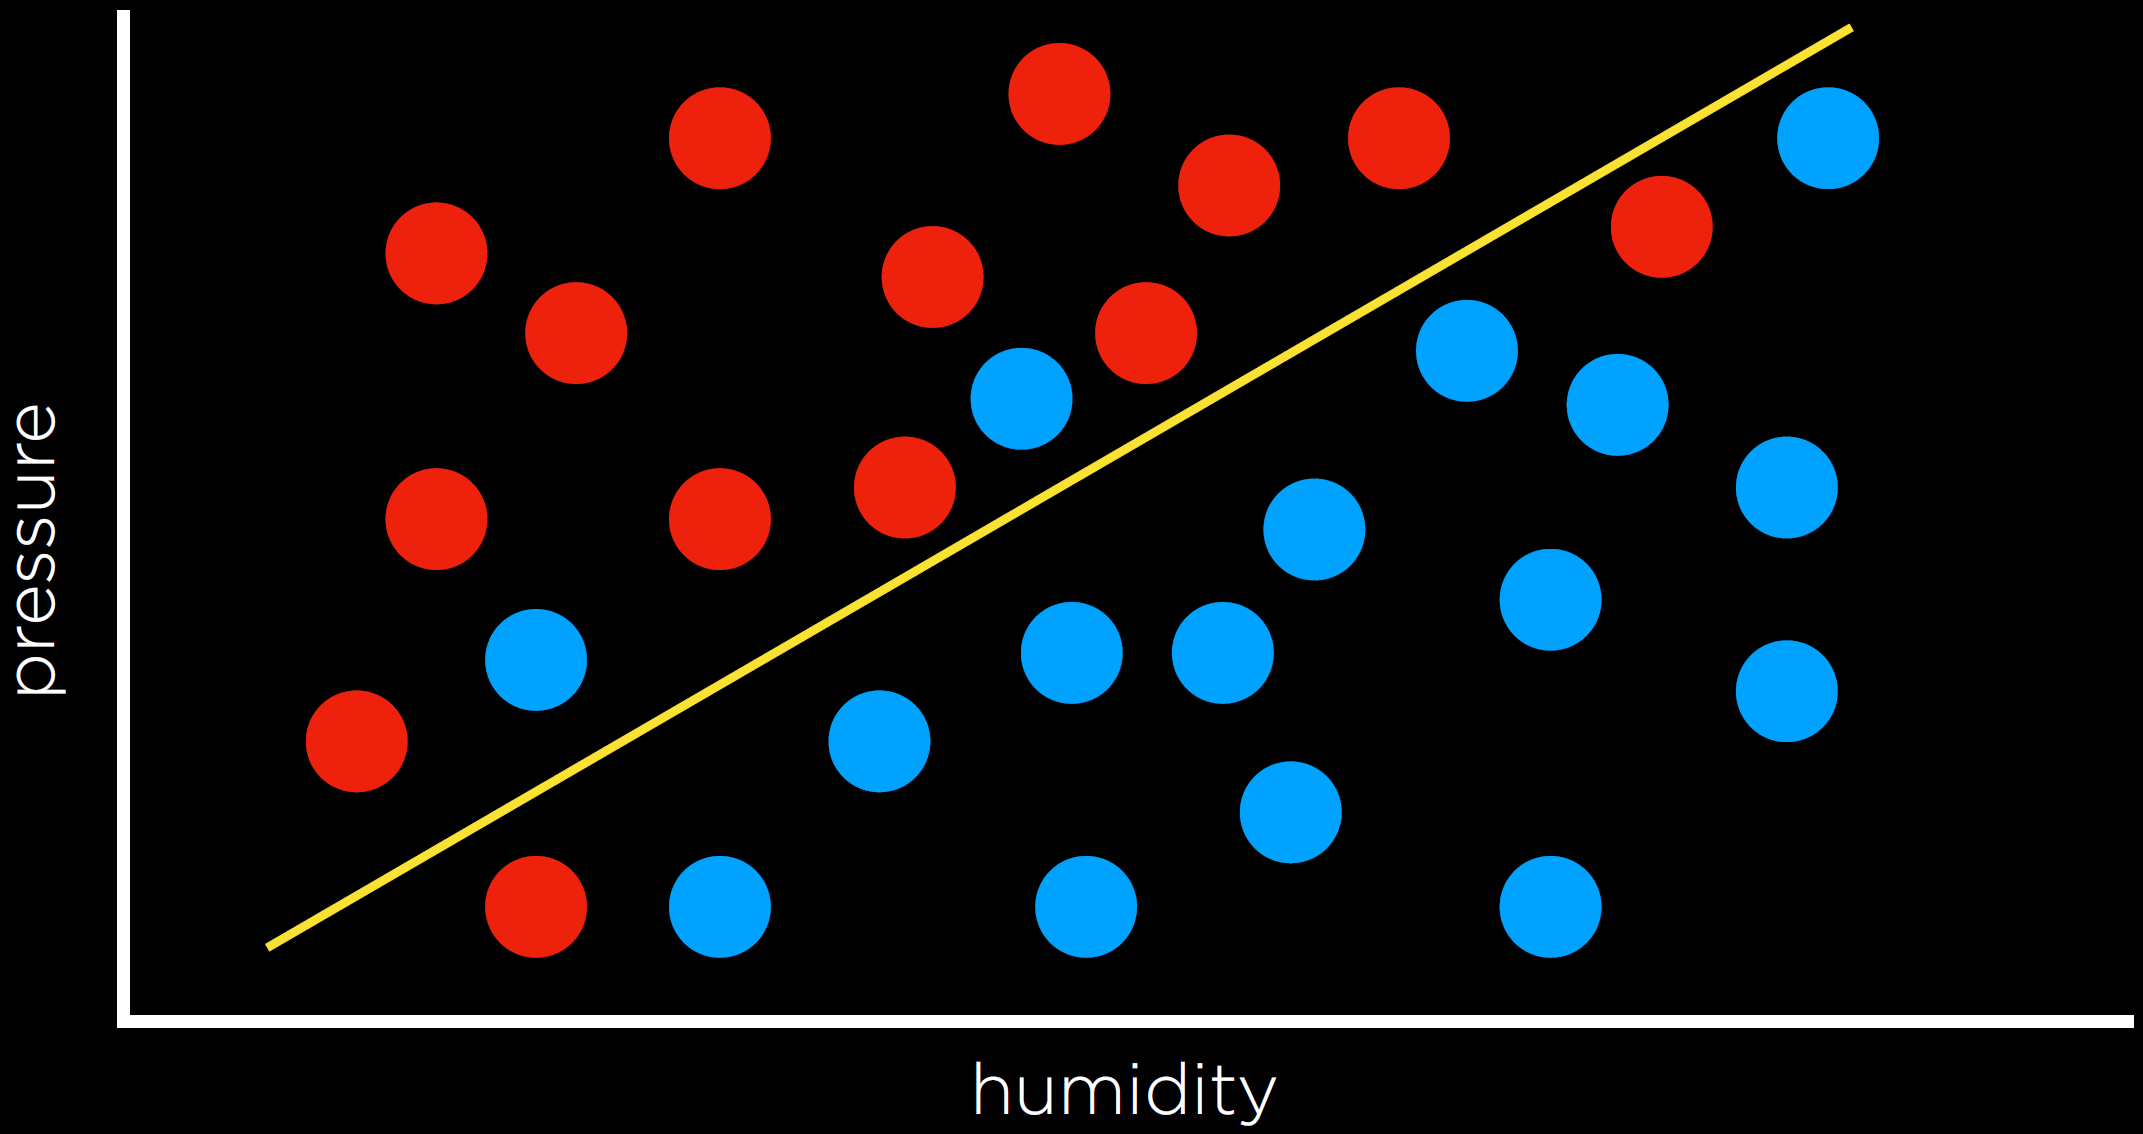

### Esempio

$x_1=$ Humidity ; 
$x_2=$ Pressure

$$
h(x_{1}, x_{2}) =
\begin{cases}
Rain & \text{if } w_0 + w_1x_1 + w_2x_2 \geq 0\\
No\ Rain & \text{otherwise } 
\end{cases}
$$

con $w_i=$ pesi relativi alle variabili, che rappresentano la pendenza della linea

### Formalizzazione

Standardizziamo la funzione $h$

$$
h(x_{1}, x_{2}) =
\begin{cases}
1 & \text{if } w_0 + w_1x_1 + w_2x_2 \geq 0\\
0 & \text{otherwise } 
\end{cases}
$$

Possiamo scrivere l'equazione che esprime il valore 1 come la combinazione di due vettori.

Ricorda che posso indicare i vettori sia con **v** che con $\vec{v}$

#### Weight Vector w

**w**: $(w_0,\ w_1,\ w_2)$

#### Input Vector x

**x**: $(1,\ x_1,\ x_2)$

L'obiettivo dell'algoritmo è trovare i migliori valori che i pesi ($w_i$) possono assumere per la miglior predizione possibile dato il vettore di input fornito.

Per farlo, facciamo il prodotto scalare dei due vettori:

$\vec{w} \cdot \vec{x}: w_0 + w_1x_1 + w_2x_2$

Espressione generale:

$$
h_w(\vec{x}) =
\begin{cases}
1 & \text{if } \vec{w} \cdot \vec{x} \geq 0\\
0 & \text{otherwise } 
\end{cases}
$$

### Perceptron Learning Rule

Regola con cui l'algoritmo trova il miglior Weight vector quando incontra nuovi dati, aggiornando i pesi.

Detta anche **Gradient descent**

Dato un data point (x,y), aggiorna ogni peso secondo la regola:

$$
w_i = w_i + \alpha(y - h_w(\vec{x})) \cdot x_i 
$$

**Spiegazione:**

Per ogni data point, aggiustiamo i pesi per rendere la funzione più accurata.

Ogni peso è reso uguale a sé stesso più un certo valore tra parentesi. Qui, $y$ è il valore osservato mentre la funzione ipotesi sta per la stima. Se sono identici, tutto il termine equivale a 0 e il peso non cambia.

Se sottostimiamo, allora il valore nelle parentesi sarà 1 e il peso aumenterà di un valore $x_i$ scalato per il learning coefficient $\alpha$.

Se sovrastimiamo, allora il valore tra parentesi sarà -1 e il peso diminuirà di $x_i \cdot \alpha$.

Maggiore è $\alpha$, più forte è l'influenza che ogni nuovo evento ha sul peso.

Il risultato di questo processo è una funzione soglia che cambia da 0 a 1 una volta che il valore stimato supera una determinata soglia:

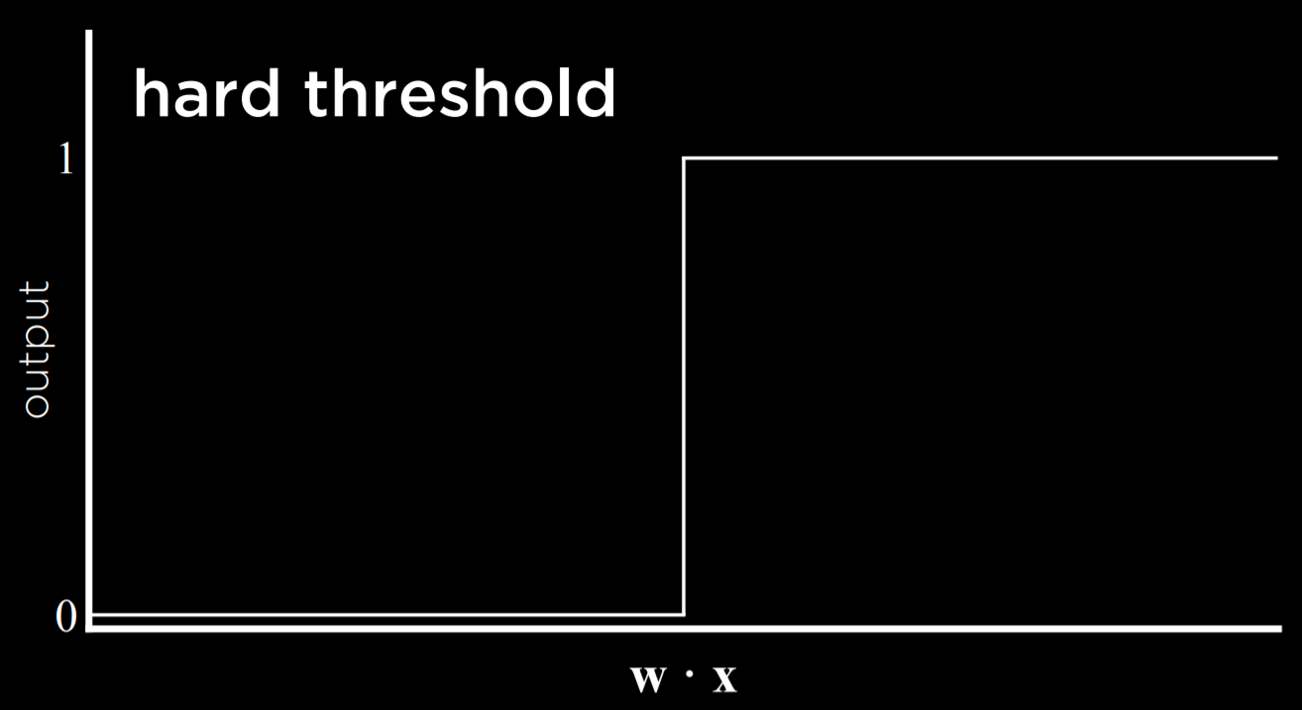

Il problema con questo tipo di funzione è che non è in grado di esprimere incertezza, visto che può essere uguale solo a 0 o a 1: utilizza una **hard threshold**

Un modo per aggirare questo problema è usare una funzione logistica, che usa una **soft threshold**.

Una funzione logistica può risultare in un numero reale tra 0 e 1, che esprimerà la confidenza nella stima. Più vicino a 1 è il valore, più è probabile che sia vero.

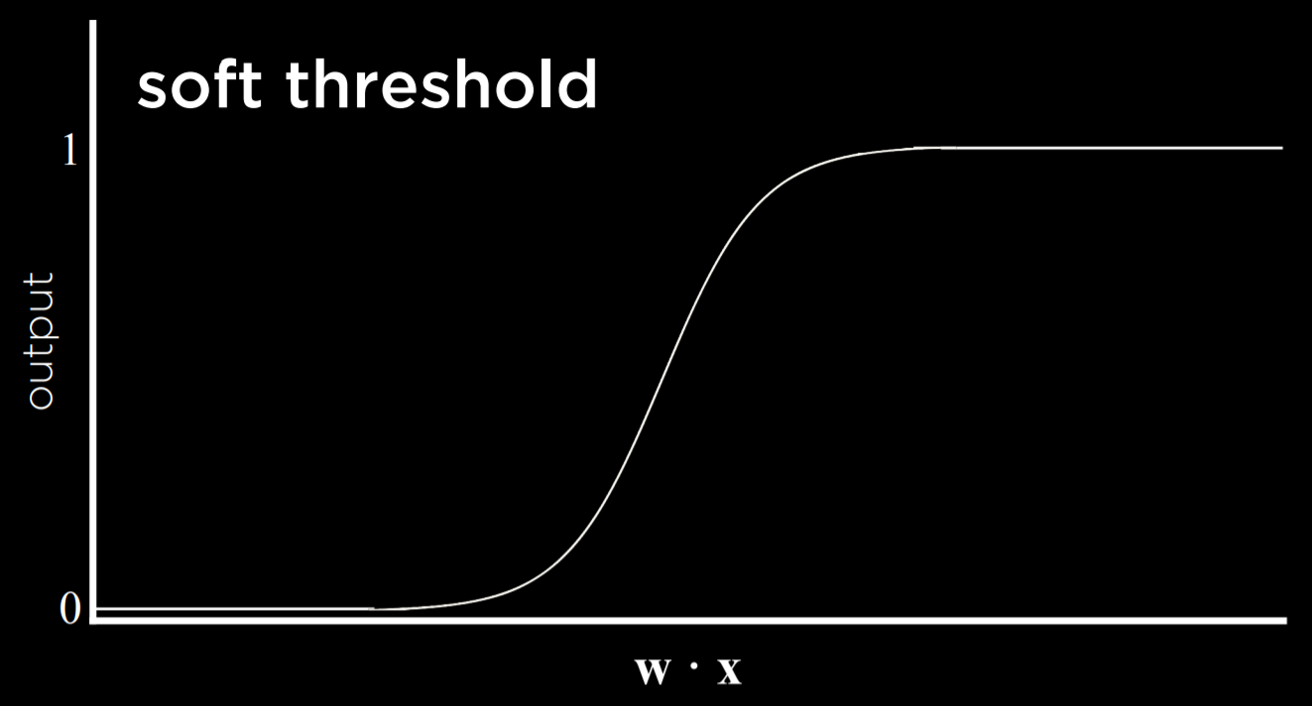

## Support Vector Machines (SVM)

Un altro approccio alla Classificazione.

Questo algoritmo usa un vettore aggiuntivo (support vector) vicino al margine della linea di separazione per prendere la miglior decisione possibile quando si separano i dati.

Considerato l'esempio:

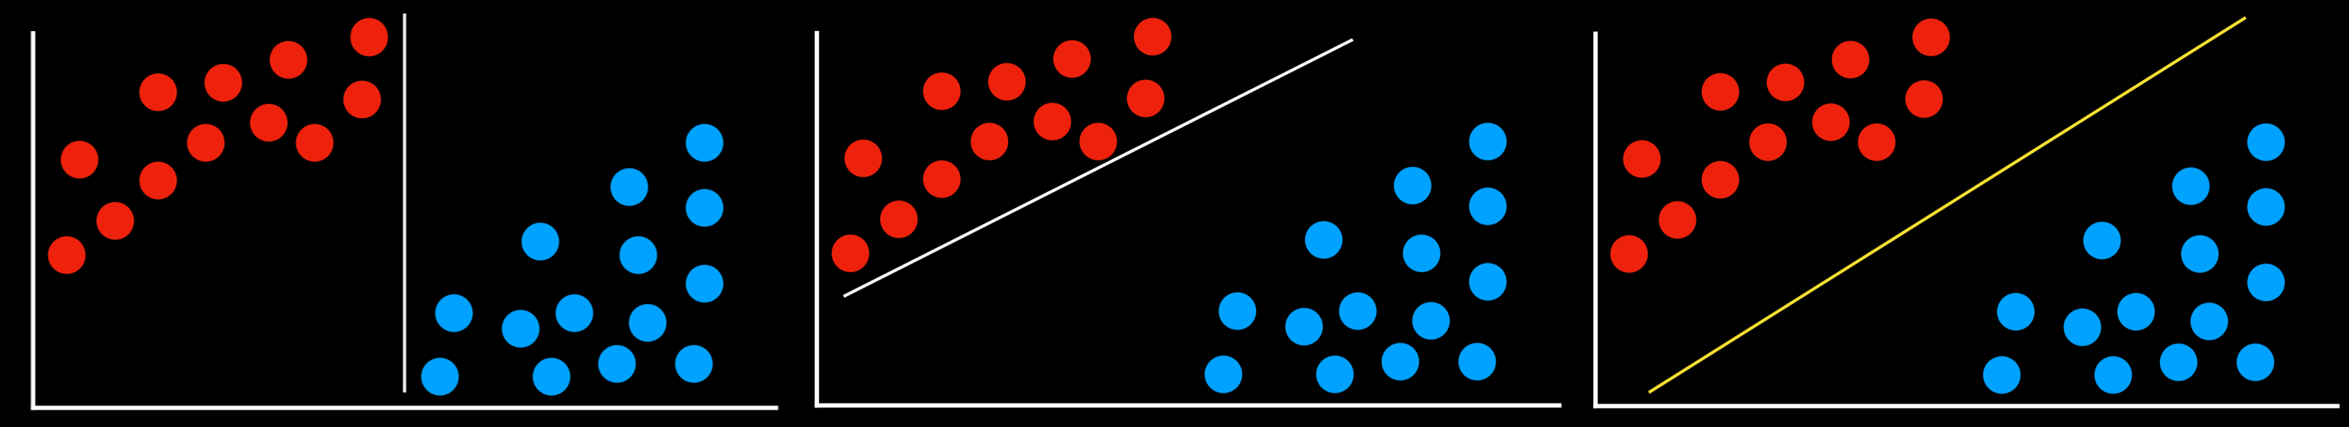

Tutte le superfici decisionali separano le due classi, ma non sono ugualmente buone.

Le due a sinistra sono troppo vicine ad alcune osservazioni. Questo vuol dire che un nuovo data point che differisce leggermente da un gruppo può essere classificato erroneamente come l'altro.

In contrasto, la superficie decisionale di destra mantiene la distanza massima da ogni gruppo, quindi dando più spazio possibile alle variazioni.

Questo tipo di delineamento è detto **Maximum Margin Separator**: margine che massimizza la distanza tra tutti i data point.

Un altro beneficio delle SVM è che possono rappresentare superfici decisionali anche con più di due dimensioni, così come superfici non lineari, come:

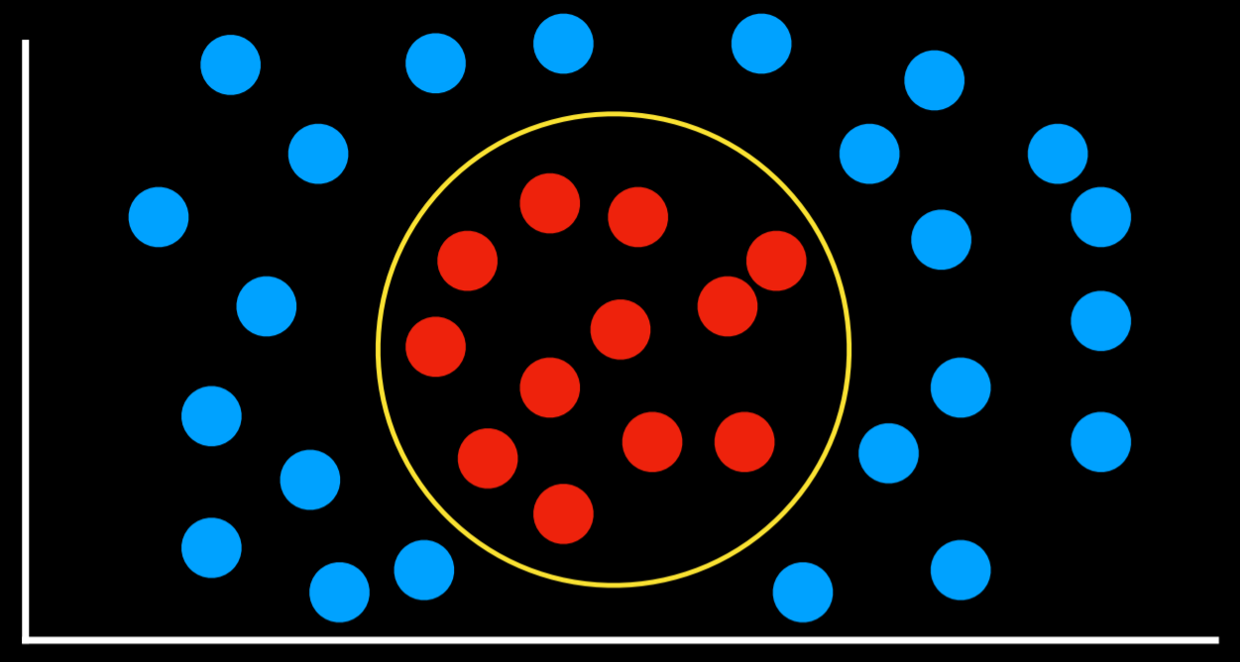

Quindi, ci sono più modi di affrontare i problemi di Classificazione, e nessuno è sempre meglio dell'altro.

# Regressione

Task di Supervised Learning. La Regressione è usata per mappare un punto di input a un valore continuo.

## Esempio

Una compagnia potrebbe voler usare la regressione per calcolare, data una spesa in pubblicità, quanto è il totale guadagnato.

Data una funzione osservata $f(advertising) che rappresenta il guadagno ottenuto a seguito di spese in marketing (nota che la funzione può avere più di una variabile in ingresso).

Abbiamo determinati dati iniziali, e con questi dati vogliamo ottenere la nostra funzione ipotesi $h(advertising)$ che cercherà di approssimare il comportamento di $f$.

$h$ genererà una linea il cui goal è quello di non separare tra i tipi di osservazione, ma di predirre, basandosi sull'input, quale sarà il valore di output.

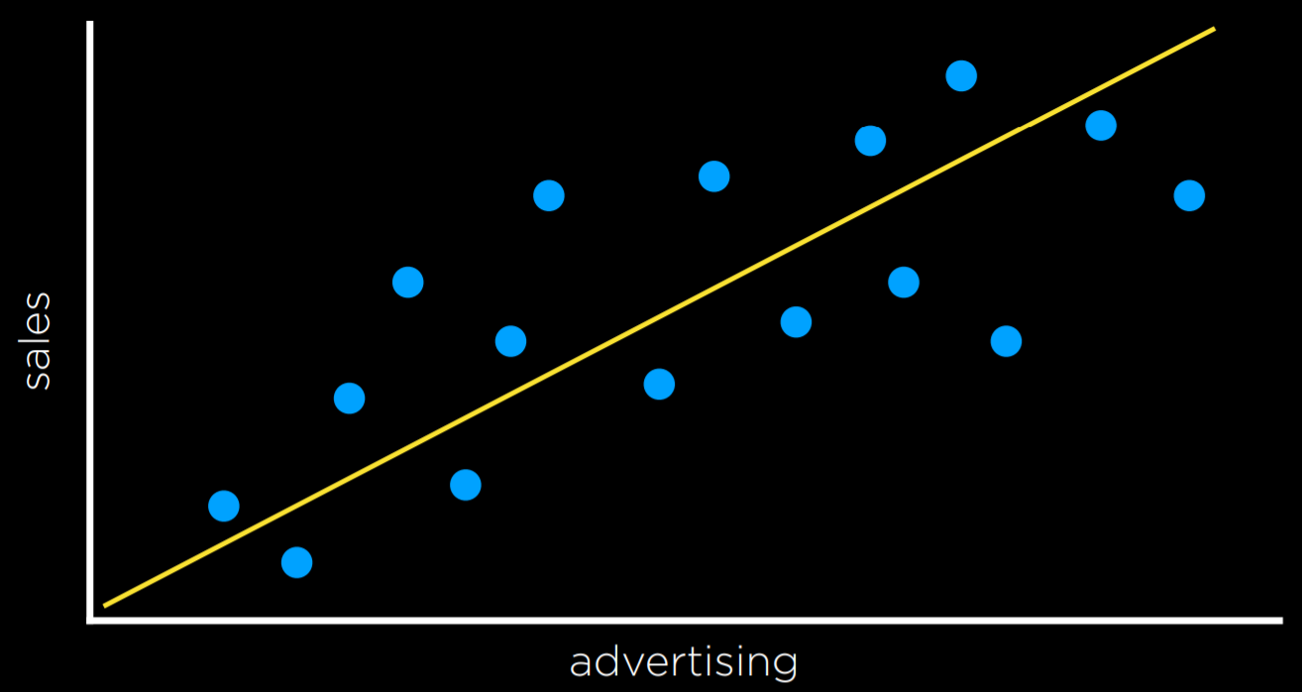

# Valutazione delle ipotesi

Come faccio a ottimizzare i miei processi di Learning? Qualcosa che sia generalmente applicabile a ogni tipo di learning. Diamo uno sguardo a:

- Loss Function
- Overfitting
- Regularization

## Loss Function

Funzione che esprime l'utilità persa dalla nostra ipotesi.

La loss function esprime quanto bassa è la performance di una qualsiasi decisione presa, come ad esempio gli algoritmi citati in precedenza.

Alcune loss function:
- Per le Classificazioni:
  - **0-1 loss function**
- Per le Regressioni:
  - $L₁$ **loss functions**
  - $L₂$ **loss functions**

### 0-1 Loss Function

```
L(actual, predicted):
    0 if actual = predicted
    1 otherwise
```

In altre parole, questa loss function ottiene valore quando la predizione è scorretta. Viceversa, non ottiene valore quando la predizione è corretta.

**Esempio della pioggia precedente**

La nostra loss si trova nei punti dal lato "sbagliato" della linea

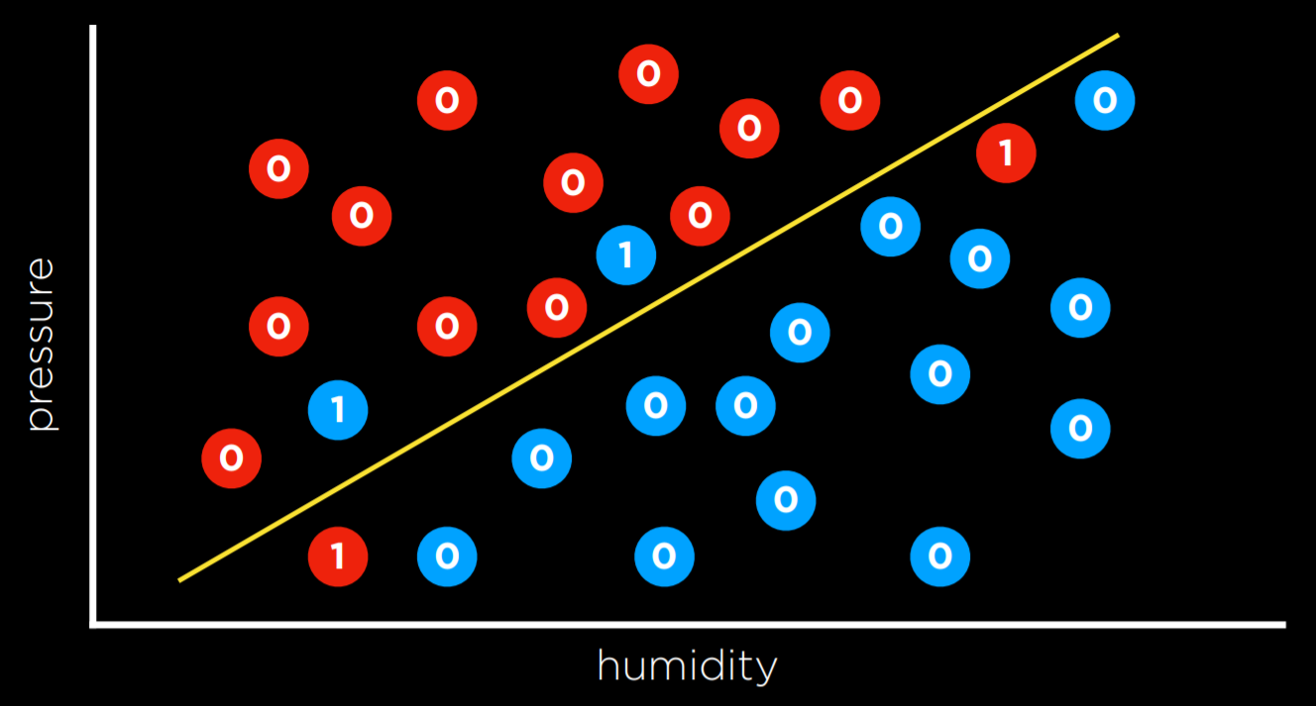

### $L_1$ loss function

$L₁: L(actual, predicted) = |actual - predicted|$

Stiamo valutando la distanza tra la nostra predizione e il valore effettivo.

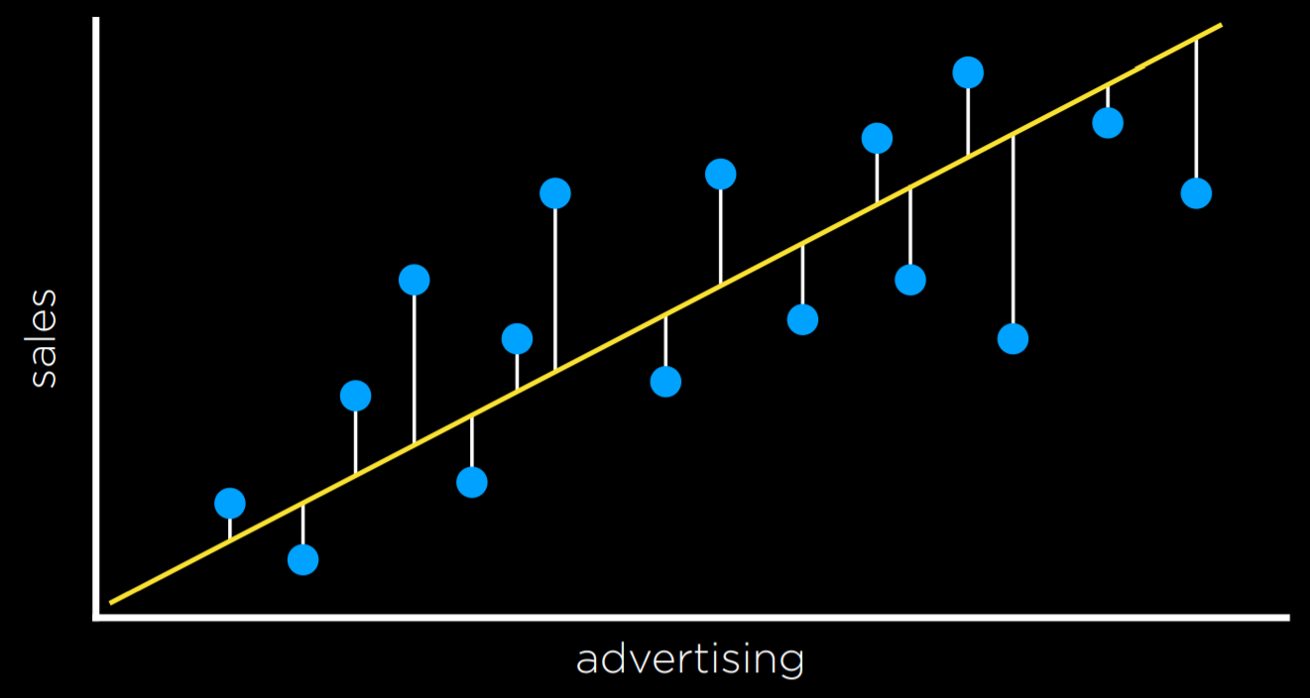

### $L_2$ loss function

$L₂: L(actual, predicted) = (actual - predicted)²$

Qui, invece, usiamo la distanza al quadrato.

La differenza tra $L₁$ e $L₂$ è che $L₂$ punisce molto di più le predizioni peggiori.

## Overfitting

È un problema che si verifica quando un modllo è troppo congruente con un dataset particolare, di conseguenza potrebbe fallire nel generalizzarsi a nuovi dataset.

Ad esempio:
- Classificazione: nel grafico a sinistra, un nuovo datapoint vicino al rosso in basso è probabilmente un blu, ma il modello oevrfittato lo classificherà come rosso.
- Regressione: nel grafico a destra, questa predizione overfitta il modello ai valori dati, e qualsiasi punto sia al di fuori di esso sarà segnato come loss anche se non è vero.

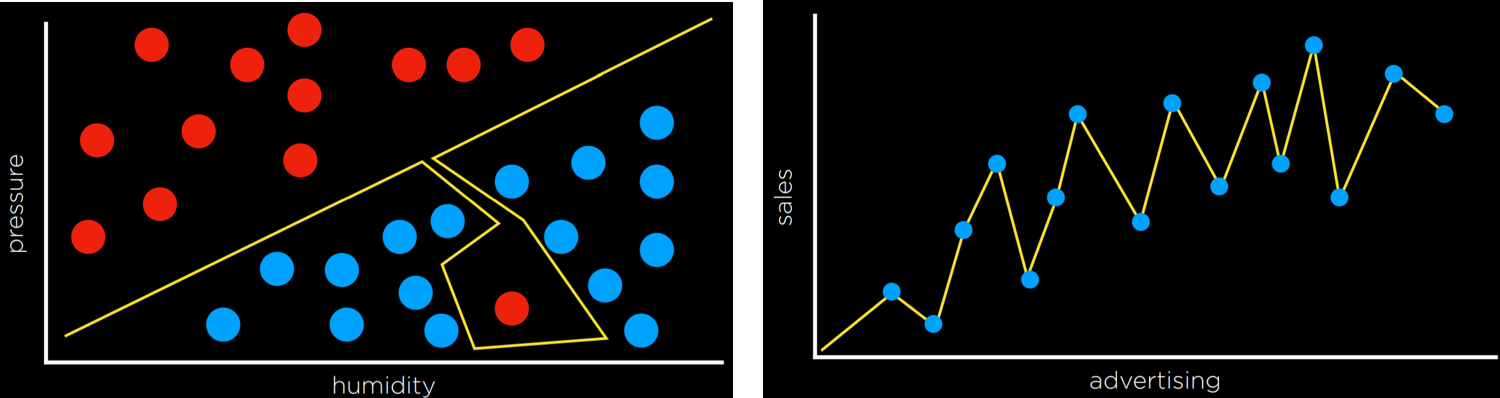

### Ovviare all'overfitting

Ci sono vari metodi:
- Regolarizzazione
- Holdout Cross-Validation
- k-Fold Cross-Validation

#### Regolarizzazione

La regolarizzazione è il processo di penalizzare ipotesi che sono più complesse in favore di quelle più semplici e generali. Usiamo la regolarizzazione per evitare overfitting.

Nella regolarizzazione, stimiamo il costo della funzione ipotesi $h$ sommando la sua loss e una misura della sua complessità:

$$
cost(h) = loss(h) + \lambda\ complexity(h)
$$

- $\lambda$: costante che possiamo usare per modulare quanto vogliamo penalizzare la complessità nella cost function. Più grande è $\lambda$, più costa la complessità.

#### Holdout Cross-Validation

Con questa tecnica, dividiamo tutti i dati in:
- **Training Set**
- **Test Set**

Eseguiamo l'algoritmo di taratura sul training set, poi vediamo quanto bene predice i dati nel test set.

Testando l'algoritmo su dati che non sono stati usati durante il training, possiamo misurare quanto bene si generalizza il learning.

Il lato negativo è che non facciamo training sulla metà dei dati, visto che vengono usati a scopi di valutazione.

#### k-Fold Cross-Validation

Questo algoritmo risolve il problema dell'Holdout Cross-Validation.

In questo processo, dividiamo i dati in $k$ set.

Eseguiamo poi il training $k$ volte, ogni volta lasciando fuori un dataset e usandolo come test set.

Alla fine, abbiamo $k$ valutazioni diverse del nostro modello, di cui possiamo la media e ottenere una stima di come generalizza il nostro modello senza perdere dati.

# scikit-learn

La più usata libreria che contiene algoritmi per M.L.

## Esempio con scikit-learn

Usiamo un CSV di banconote false: [banknotes.csv](banknotes.csv)

Le prime quattro colonne sono dati che possiamo usare per predirre se la banconota è genuina o contraffatta, che è un dato esterno dato da un umano, codificate con 0 e 1.

Ora possiamo allenare il nostro modello su questo dataset e vedere se possiamo prevedere se nuove banconote sono vere o false:

In [91]:
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)
model = svm.SVC()
# model = Perceptron()

Nota che dopo aver importato le librerie, possiamo decidere che modello usare. Il resto del codice sarà lo stesso.

- SVC sta per Support Vector Classifier, che conosciamo come Support Vector Machine.
- KNeighborsClassifier usa la strategia k-NN e richiede l'input del numero di vicini che deve considerare.

In [103]:
# Read data in from file
with open("banknotes.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

# Separate data into training and testing groups
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# Train model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# Make predictions on the testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for model SVC
Correct: 545
Incorrect: 3
Accuracy: 99.45%


Questa versione manuale di eseguire l'algoritmo può essere trovata in [banknotes0.py](banknotes0.py).

Dal momento che l'algoritmo è spesso usato in modi simili, scikit-learn contiene funzioni addizionali che rendono il codice ancora più succinto e facile da usare. Questa versione più snella può essere vista in [banknotes1.py](banknotes1.py)

# Reinforcement Learning

Un altro modo per affrontare il learning, differentementa da Classification e Regression.

Dopo ogni azione, l'agente (IA) ottiene feedback nella forma di premio o punizione (valore numerico positivo o negativo) per capire l'azione migliore da intraprendere.

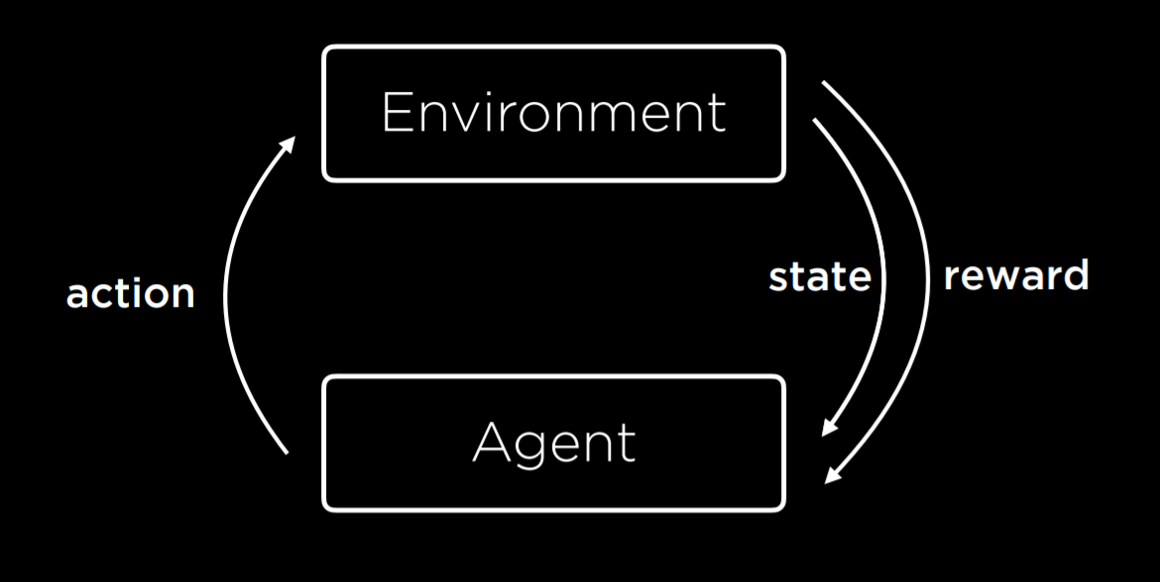

Il processo di learning inizia con l'ambiente che fornisce uno stato all'agente.

Poi, l'agente performa un'azione sullo stato.

Basandosi su quest'azione, l'ambiente restituirà uno stato e una ricompensa all'agente, che può essere positiva, rendendo il comportamento <u>più</u> probabile in futuro, o negativo (punizione), rendendo il comportamento <u>meno</u> probabile in futuro.

Ci sono vari metodi per implementare il Reinforcement Learning:
- **Markov Decision Process**
- **Q-learning**

## Markov Decision Process

Modello decisionale che rappresenta stati, azioni e ricompense.

Simile alla Catena di Markov:

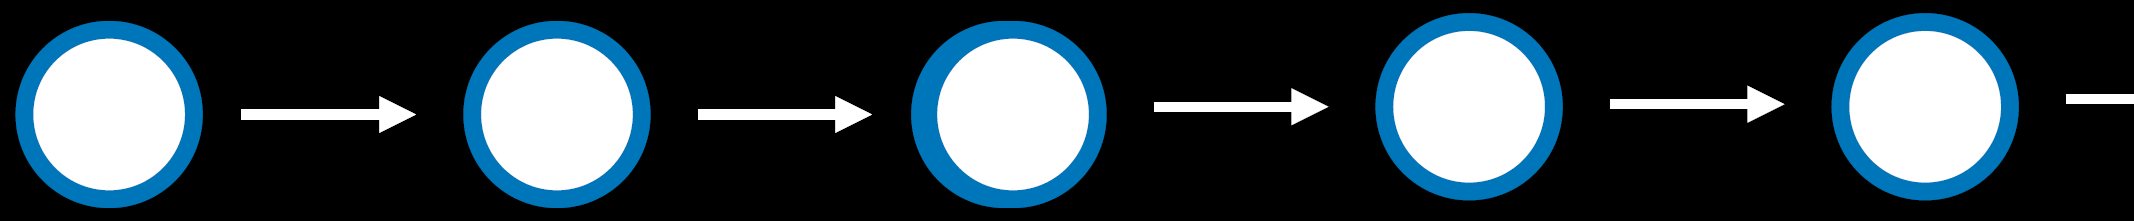

La differenza sta nel fatto che, ora, l'agente è in grado di decidere tra un *set* di azioni, e non solo di seguire la catena.

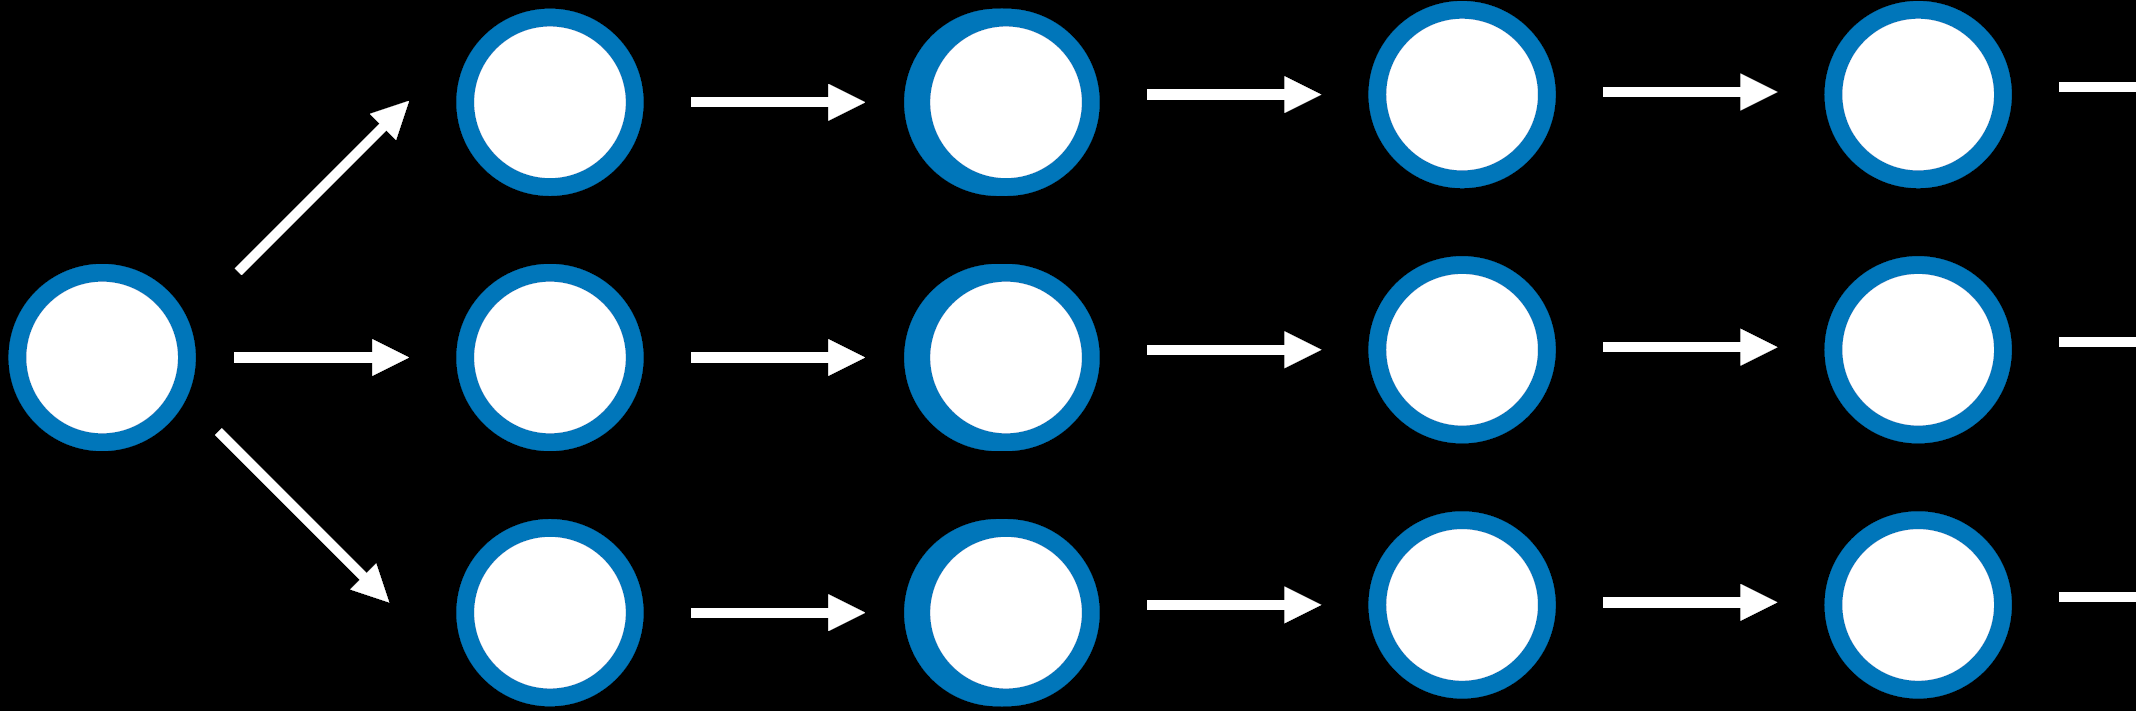

L'immagine sopra è solo un esempio. Ognuno di quei singoli stati potrebbe ramificarsi in altre catene.

Dopodiché, una volta compresa questa ramificazione, possiamo associare a ogni mossa una ricompensa $r$:

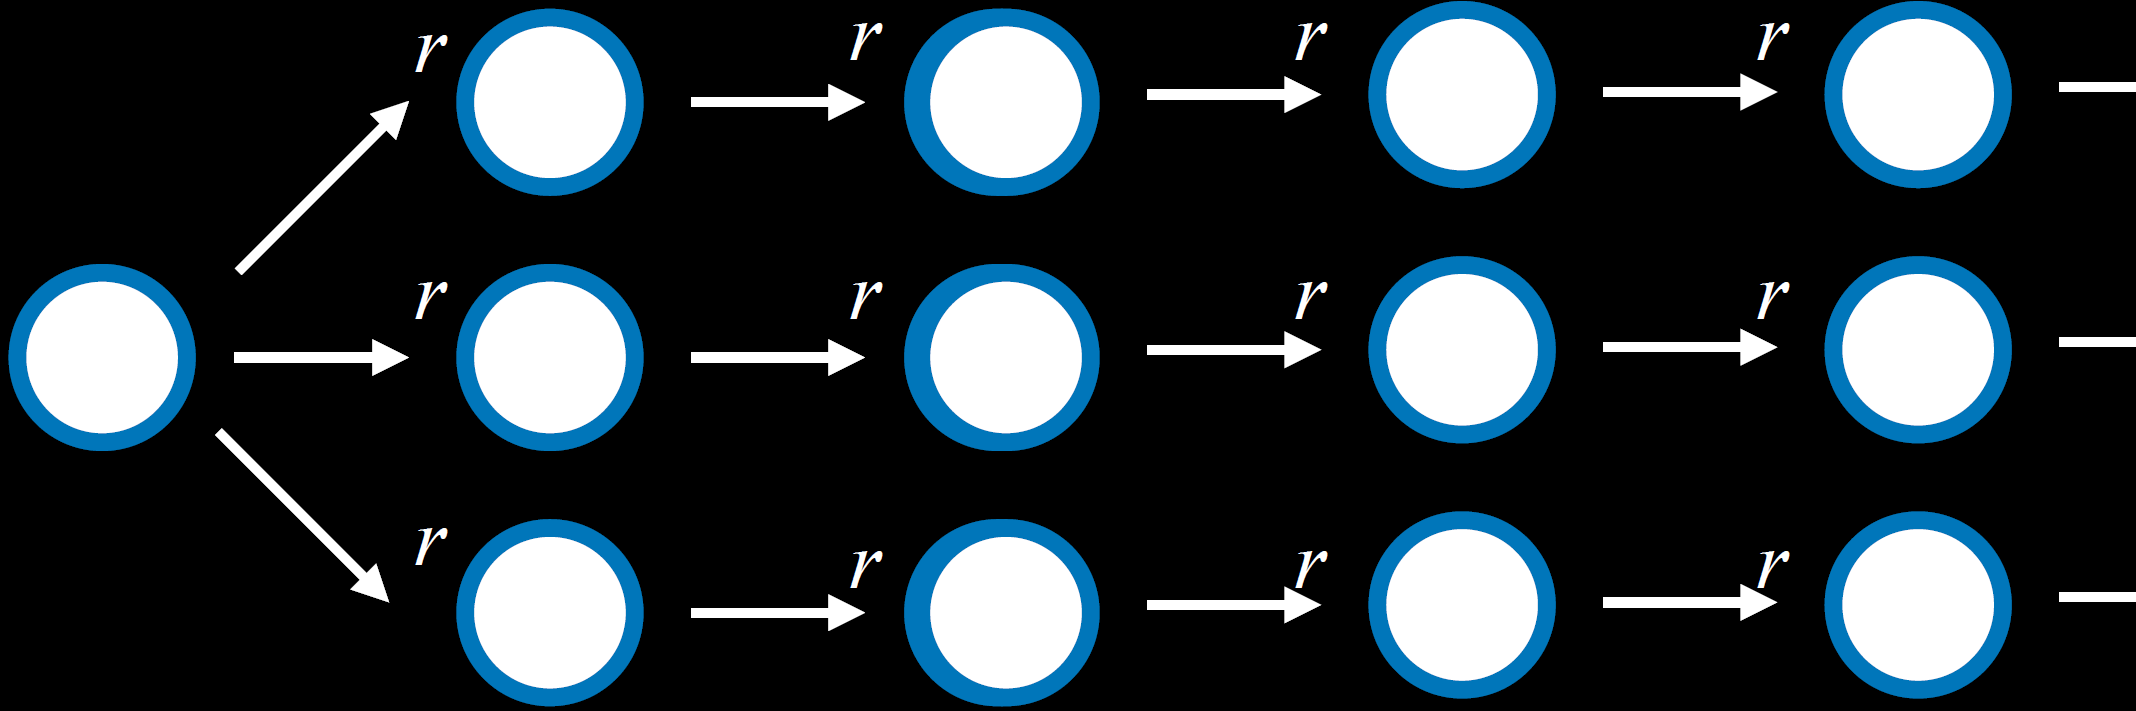

**Questo** è un Markov Decision Process

### Proprietà del Markov Decision Process

- Set di stati: $S$
- Set di azioni: $Actions(S)$
  - Dato uno stato $S$, quali $Azioni$ posso effettuare in quello stato?
- Transition model: $P(s' \mid s,\ a)$
  - Dato il mio stato corrente $s$ e la mia scelta di azione $a$, quale è la probabilità di andare nello stato $s'$?
- Reward function: $R(s,\ a,\ s')$
  - Quale è la ricompensa per essere nello stato $s$, eseguire l'azione $a$ e finire nello stato $s'$?

#### Esempio M.D.P.

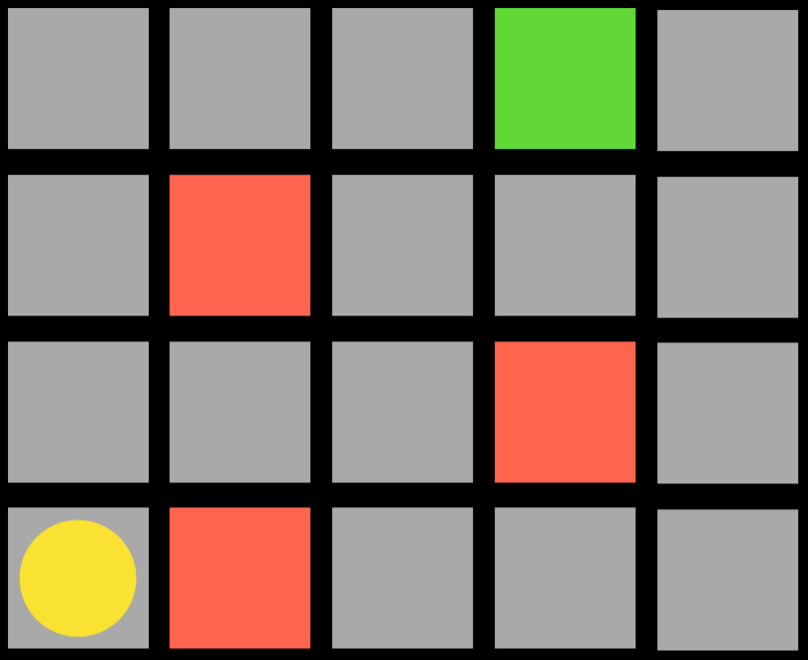

- Il mio agente è il cerchio giallo, e deve raggiungere la cella verde evitando quelle rosse.
- Ogni singola cella è uno stato. Muoversi sopra, sotto o ai lati è un'azione.
- Il Transition model ci da un nuovo stato dopo aver effettuato un'azione, e la Reward function è il tipo di feedback che l'agente ottiene.

Ad esempio, se l'agente sceglie di andare a destra, andrà in una cella rossa e otterrà feedback negativo. Ciò significa che l'agente imparerà che quando lo stato è la cella in basso a sinistra deve evitare di andare a destra.

L'algoritmo può essere probabilistico, scegliendo di intraprendere azioni diverse in stati diversi basandosi su qualche probabilità che è aumentata o diminuita a seconda delle ricompense. Ad esempio, dopo essersi mosso sopra poi a destra, potrebbe evitare di andare giù.

Quando l'agente raggiunge la cella verde, otterrà una ricompensa positiva, imparando che è più favorevole effettuare l'azione fatta nello stato precedente.

## Q-learning

È un tipo di Reinforcement Learning in cui la funzione $Q(s,\ a)$ restituisce una stima del valore dell'esecuzione dell'azione $a$ nello stato $s$.

#### Spiegazione letterale

* Il modello inizia con una stima dei valori pari a 0, cioè: $Q(s,\ a)=0\ \ \ \ \ \forall s,\ a$

* Quando un'azione viene eseguita e una ricompensa viene ricevuta, la funzione fa due cose:
  * Stima il valore di $Q(s,\ a)$ basandosi sulla ricompensa attuale e l'aspettativa delle ricompense future
  * Aggiorna $Q(s,\ a)$ tenendo conto sia della stima precedente che quella nuova.

Ciò ci da un algoritmo capace di migliorare la sua conoscenza pregressa, evitando di partire da 0

#### Formalizzazione

* Iniziamo con $Q(s,\ a)=0\ \ \ \ \ \forall s,\ a$
* Ogni volta che viene eseguita un'azione $a$ nello stato $s$ e osserviamo una ricompensa $r$, aggiorniamo la funzione:
$$
Q(s,\ a) ⟵ \text{Q}(s,\ a) + α(new\ value\ estimate - old\ value\ estimate)
$$

___
**Cosa stiamo facendo?**

Innanzitutto presta attenzione alla differenza tra i valori $(Q,\ s,\ a\ )$ e i valori $(\text{Q},\ \text{s},\ \text{a})$

Il valore aggiornato di $Q(s,\ a)$ è uguale al valore precedente di $Q(s,\ a)$ sommato a un valore di update: $α(new\ value\ estimate - old\ value\ estimate)$.

Questo valore di update è determinato come la differenza tra il nuovo valore e quello vecchio, moltiplicato per $\alpha$, il learning coefficient.

Il comportamento dell'addendo con la nuova stima varia a seconda di $\alpha$:

- $\alpha=1$: la nuova stima sovrascrive quella vecchia.
- $\alpha=0$: il valore stimato non viene aggiornato.

Alzando e abbassando $\alpha$, possiamo determinare quanto velocemente la conoscenza pregressa si aggiorna con le nuove stime, quindi quanto valore diamo alle nuove informazioni.
___
Il nuovo valore stimato $(new\ value\ estimate)$ può essere espresso come la somma della ricompensa $r$ e la stima della ricompensa futura $\text{Q}(s',\ a')$, mentre la stima vecchia è $\text{Q}(s,\ a)$.

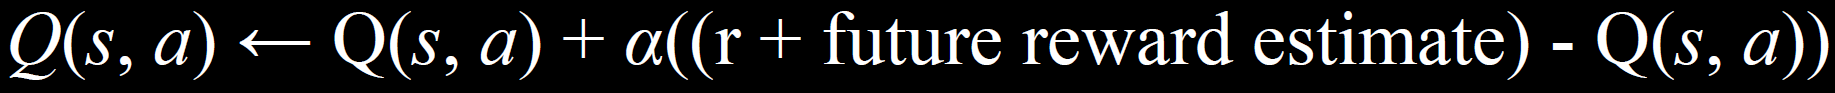

Per ottenere la stima della ricompensa futura, consideriamo il nuovo stato ottenuto dopo aver eseguito l'ultima azione, a cui aggiungiamo la stima dell'azione di questo nuovo stato che porterebbe alla ricompensa migliore.

$$
\text{future reward estimate}=\text{max}_{\text{a}'}\ \text{Q}(\text{s}',\ \text{a}')
$$

In questo modo, stimiamo l'utilità di eseguire l'azione $a$ nello stato $s$ non solo dalla ricompensa ricevuta, ma anche dall'utilità stimata nel passo successivo.

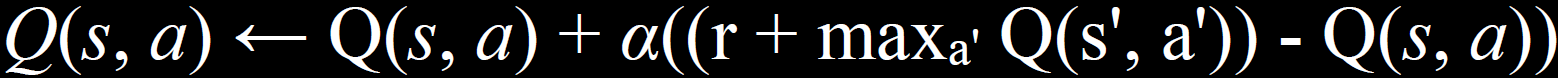

Il valore della stima della ricompensa futura a volte può apparire con un coefficiente $\gamma$ che controlla quanto vengono valutate le ricompense future, quindi ha un comportamento simile ad $\alpha$. Otteniamo la seguente equazione:

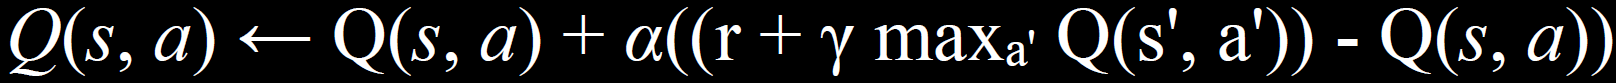

Una volta ottenuta una stima per ogni stato, azione e ricompensa, possiamo decidere di implementare algoritmi che agiscono basandosi su di esse. Ad esempio **Greedy Decision-Making**

### Greedy Decision-Making

Quando si trova nello stato $s$, sceglie sempre l'azione $a$ con $Q(s,\ a)$ maggiore.

Si tratta di un algoritmo che ignora completamente la stima delle ricompense future. Questo può essere problematico, perché se un agente conosce una sequenza di azioni non ottimali ma che comunque portano a una ricompensa positiva, potrebbe bloccarsi in quella sequenza e non migliorare mai.
___
Questo ci porta a discutere il tradeoff **Explore vs. Exploit**:

**Exploit:**

* Un algoritmo greedy fa sempre exploit, cioè usa azioni che sono state già stabilite per ottenere risultati favorevoli. Seguirà, però, sempre lo stesso percorso verso la soluzione, senza mai trovare un percorso migliore.

**Explore:**

* Esplorare vuol dire che l'algoritmo può usare un percorso non ancora usato lungo la strada per il goal., permettendogli di scoprire soluzioni più efficienti lungo il percorso.

Possiamo implementare il concetto di exploration e exploitation usando l'algoritmo **ε-greedy**

### ε-greedy

In quest'algoritmo, poniamo $ε$ uguale a quanto spesso vogliamo muoverci in maniera randomica.

- Con probabilità $1-ε$, l'algoritmo sceglie la mossa migliore (exploitation).
- Con probabilità ε, l'algoritmo sceglie una mossa casuale (exploration)

### Reinforcement alternativo e Funzione approssimativa

Invece di dare feedback ad ogni mossa, potremmo dare la ricompensa alla fine dell'intero processo.

Ad esempio, consideriamo il gioco Nim: in questo gioco ci sono un numero finito di oggetti, distribuiti in pile. Ogni giocatore prende un numero qualsiasi di oggetti da una singola pila, e il giocatore che prende l'ultimo oggetto in assoluto perde.

In un gioco del genere, un'IA non addestrata giocherà randomicamente, quindi è facilmente battibile da una persona. Per addestrare l'IA, la faremo giocare casualmente e, alla fine, otterrà 1 per una vittoria e -1 per una sconfitta. Quando è addestrata su 10k di partire, ad esempio, diventa abbastanza intelligente da essere quasi impossibile batterla.

Quest'approccio diventa computazionalmente più pesante quando un gioco ha multipli stati e azioni possibili, come scacchi. Non è possibile generare un valore stimato per ogni mossa possibile in ogni stato possibile. In questo caso, usiamo una **approssimazione tramite funzione**

### Approssimazione tramite funzione (Function approximation)

Approssima $Q(s,\ a)$, spesso con una funzione che combina altri parametri, piuttosto che conservare un valore per ogni coppia stato-azione.

Quindi, l'algoritmo diventa in grado di riconoscere quale mossa è abbastanza simile in modo che anche il valore stimato sarà simile, e userà quest'euristica nel processo decisionale.

# Unsupervised Learning

Avendo in input dati senza feedback addizionale, impara i pattern.

Nell'Unsupervised Learning, è presente solo l'informazione di input, e l'IA impara pattern in questi dati.

In tutti i casi mostrati finora, come Supervised Learning, avevamo dati etichettati da cui l'algoritmo può imparare, come l'esempio delle banconote.

La task di Unsupervised Learning che vedremo è **Clustering**

## Clustering

Il Clustering prende oggetti in input e li organizza in gruppi, in modo tale che oggetti simili finiscano nello stesso gruppo.

Questo può essere usato, per esempio, nella ricerca genetica o image segmentation, trovando similitudini tra pixel.

Un algoritmo per eseguire Clustering è **k-means Clustering**

### k-means Clustering

Algoritmo per raggruppare dati basandosi sull'assegnazione ripetuta di punti ai cluster e aggiornando i centri dei cluster.

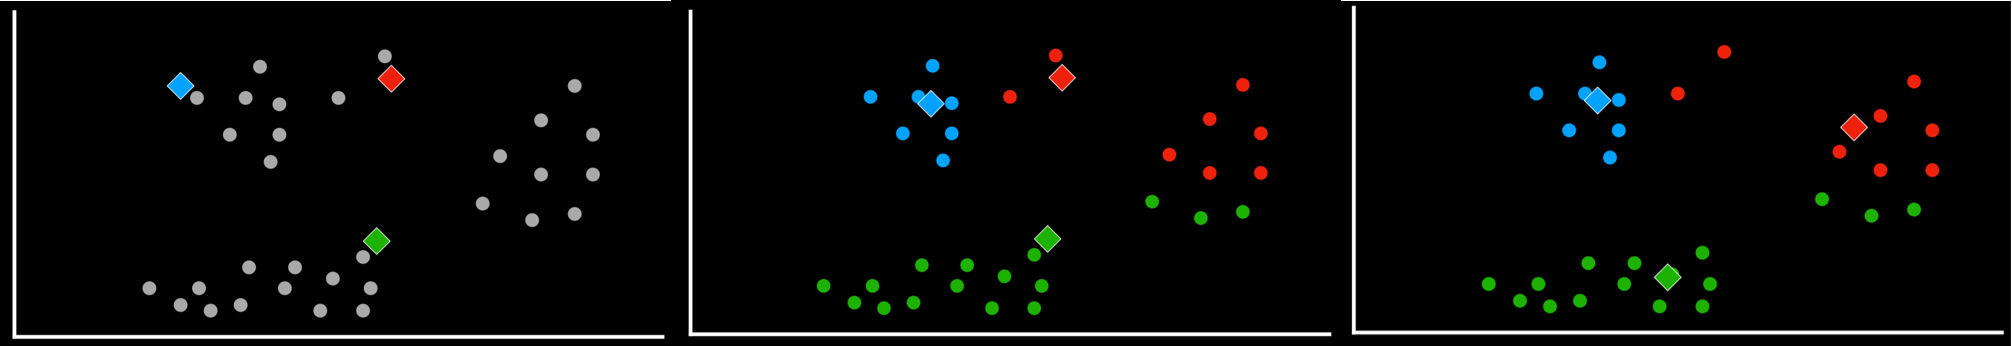

L'algoritmo mappa tutti i data point nello spazio, poi piazza randomicamente $k$ centri di cluster nello spazio, dipende dal programmatore quanti. Ogni centro di un cluster è semplicemente un punto nello spazio, e non un dato. Questo è lo stato iniziale, a sinistra nell'immagine.

Poi, a ogni cluster vengono assegnati tutti i punti che sono più vicini al suo centro rispetto agli altri centri. Questo è lo stato centrale nell'immagine.

Poi, in un processo iterativo, il centro del cluster si muove verso il centro di tutti questi punti, e i punti vengono riassegnati ai cluster i cui centri, ora, sono più vicini a loro. Questo è lo stato a destra nell'immagine.

Quando, dopo aver ripetuto il processo, ogni punto rimane nello stesso cluster dello stato precedente, abbiamo raggiunto un equilibrio e l'algoritmo termina, lasciandoci i punti divisi tra i cluster.